# The Titanic Problem
The essence of this Jupyter Lab/Notebook is as an initial and complete exploration of the Titanic Machine Learning problem using logistic regression. Data has been provided via 'train.csv', to make predictions on 'test.csv' from Kaggle. 

Primarily, it is assumed that pursuing this problem is worthwhile as a method of learning, due to the countless examples and resources on this staple problem (it is like the Donut of Blender, the To-do List of Web Applications, or Hello World of Programming). \
Hence, this Jupyter Lab/Notebook will contain **analyses and plots** of the data to inform the model, from which a library like SciKit can be used rather than implementing logistic regression from scratch.

I sourced a fair bit of code from the following notebooks, which were very helpful as completed examples of approaches that I could try: [Logistic Regression with Python – mnassrib](https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python/notebook), 
[Titanic Project Example - Ken Jee](https://www.kaggle.com/code/kenjee/titanic-project-example/notebook)

### Sections
1. Data Initial Analysis 
2. Preprocessing
3. Data Exploration
4. Modelling

## Data Initial Analysis

In [31]:
import os
directory = os.getcwd()

In [346]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting
import seaborn as sns

test_data = pd.read_csv("/Users/Macbook/Desktop/Titanic/test.csv")
train_data = pd.read_csv("/Users/Macbook/Desktop/Titanic/train.csv")
print("Shape of data: ", train_data.shape)
train_data.head(2)

Shape of data:  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**The primary insights from describe() and info() are:** 
- Survived: 38.4%,  
- Age: Max = 80 years, Avg = 30 Years, Min = 0.42 year, 177 Missing Entries, 
- SibSp & Parch: Averages = 0.52, 0.38 and Max = 8, 6 
- Fare: Check table. Avg = 32, Std = 50, Max = 512

We can then visualise the numerical data via histograms, heatmaps, pivot tables and the categorical data with counts.

### Numeric Data

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

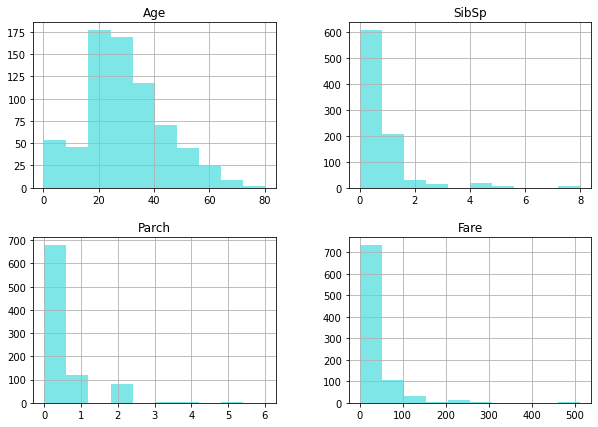

In [408]:
num_data = train_data[['Age','SibSp','Parch','Fare']]
num_data.hist(color='darkturquoise', alpha=0.5, figsize=(10,7))

<AxesSubplot:>

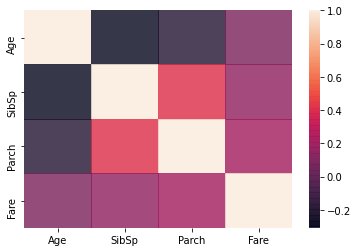

In [410]:
sns.heatmap(num_data.corr(), alpha=0.8)

In [39]:
num_data.corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


In [52]:
pd.pivot_table(train_data, index = 'Survived', values = num_data)

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


From these visualisations for the numeric data, there is, as expected a **correlation with Parch and SibSp** as both indicate a number of familial or close connections; otherwise, there is very little other notable correlation. 

From the histograms above, **Age sees a relatively normal distribution**, but with a **bigger tail on children** being aboard the Titanic, whereas all others are very skewed – **most passengers were travelling alone** or with one other sibling/spouse/parent/child and were paying an **economy fare < 100£.**

Below is a nice graph.

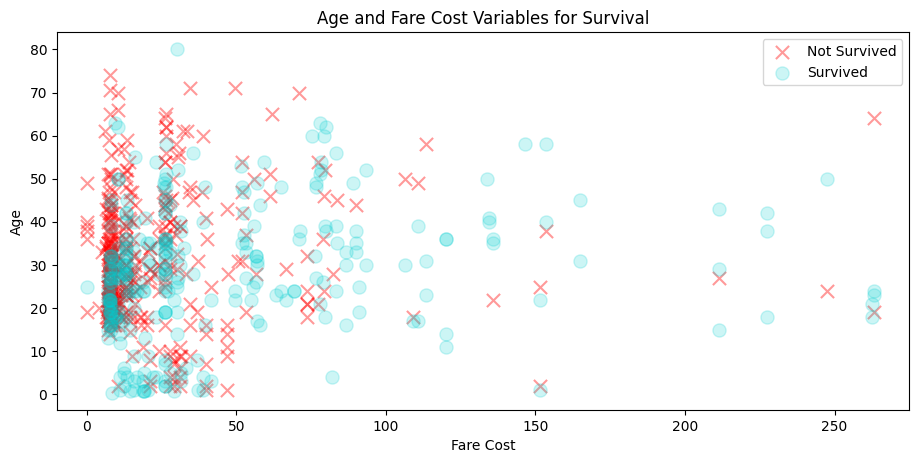

In [353]:
from matplotlib.pyplot import figure
y, x = train_data["Age"][train_data.Survived == 1], train_data["Fare"][train_data.Survived == 1]
y2, x2 = train_data["Age"][train_data.Survived == 0], train_data["Fare"][train_data.Survived == 0]
figure(figsize=(11,5), dpi=100)
plt.scatter(x2, y2, c='red', alpha=0.4, marker="x", s=90, label="Not Survived")
plt.scatter(x, y, c='darkturquoise', alpha=0.2, marker="o", s=90, label="Survived")
plt.legend(loc="upper right")
plt.xlabel("Fare Cost"), plt.ylabel("Age"), plt.title("Age and Fare Cost Variables for Survival"), plt.xlim(-10, 275)
plt.show()

### Categorical Data

Counts for Survived, Pclass, Sex and Embarked: 


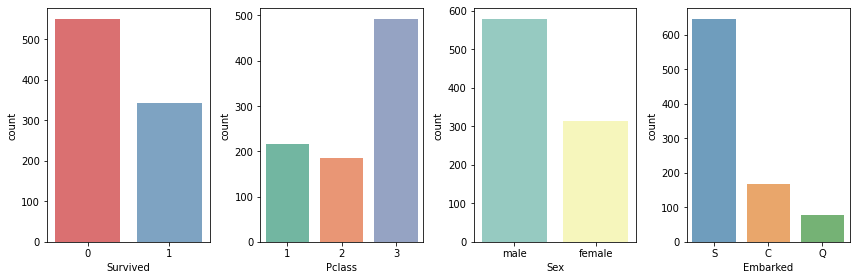

In [367]:
cat_data = train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
cat_data_nocabinticket = train_data[['Survived','Pclass','Sex','Embarked']]
figure, axes = plt.subplots(1, 4, sharex=False, figsize=(12,4))
sns.countplot(x=train_data['Survived'], data=train_data, palette='Set1', alpha=0.7, ax=axes[0])
sns.countplot(x=train_data['Pclass'], data=train_data, palette='Set2', ax=axes[1])
sns.countplot(x=train_data['Sex'], data=train_data, palette='Set3', ax=axes[2])
sns.countplot(x=train_data['Embarked'], data=train_data, alpha=0.7, ax=axes[3])
print("Counts for Survived, Pclass, Sex and Embarked: ")
plt.tight_layout()
plt.show()

Survival Rate for Pclass, Sex and Embarked: 


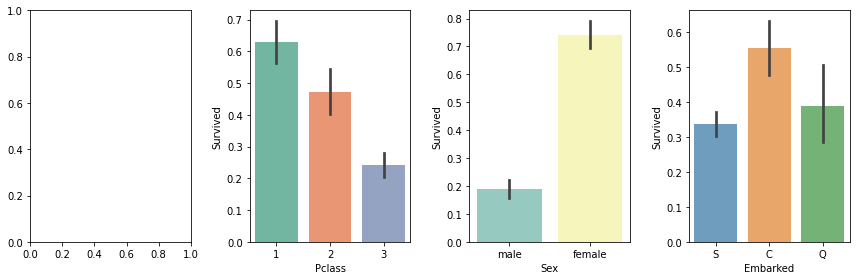

In [371]:
figure, axes = plt.subplots(1, 4, sharex=False, figsize=(12,4))
sns.barplot(x='Pclass', y='Survived', data=train_data, palette='Set2', ax=axes[1])
sns.barplot(x='Sex', y='Survived', data=train_data, palette='Set3', ax=axes[2])
sns.barplot(x='Embarked', y='Survived', data=train_data, alpha=0.7, ax=axes[3])
print("Survival Rate for Pclass, Sex and Embarked: ")
plt.tight_layout()
plt.show()

In [105]:
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Pclass', values = 'Ticket', aggfunc ='count'), "\n")
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Embarked', values = 'Ticket', aggfunc ='count'), "\n")
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Sex', values = 'Ticket', aggfunc = 'count' ))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119 

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217 

Sex       female  male
Survived              
0             81   468
1            233   109


These results actually show that there was a significantly greater chance of survival based on sex (save the women and the children) and also if they were 1st, then 2nd class and also if they embarked from C Town then Q Town.

Of the categorical data, 'Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked': the most prominent factors that would have contributed to survival are **social class and sex**. The ticket number/type and cabin should be closely correlated with social class, if there is any correlation, and the location where passengers boarded the ship intuitively should have no bearing on the survival rate, but perhaps from these results, they were also correlative with class.

### Preprocessing Data 

In [321]:
# For quick reset test of data:
test_data = pd.read_csv("/Users/Macbook/Desktop/Titanic/test.csv")
train_data = pd.read_csv("/Users/Macbook/Desktop/Titanic/train.csv")
train_data.head(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [322]:
# Try merging SibSp and Parch to one Total(family)members variable. It has a relatively high correlation.
train_data['TotalMembers'] = train_data["SibSp"] + train_data["Parch"]
new_data = train_data[['TotalMembers', 'SibSp', 'Parch']]
new_data.corr()

,TotalMembers,SibSp,Parch
TotalMembers,1.000000,0.890712,0.783111
SibSp,0.890712,1.000000,0.414838
Parch,0.783111,0.414838,1.000000


This section includes the various processes to clean up and manage the data for the modelling in the next step.
1. Include only relevant variables.
2. Values should be imputed for the missing entries in Embarked and Age. This can be done by acquiring the median (for skewed data)/mean for age and fare cost. 
3. Normalisation using logs to give more normal distribution and/or scaling data 0-1 with e.g. a standard scaler.
4. Do categorical transforms on all data or use a transform, to ensure the training and test data have the same columns. (Ken)

In [323]:
## Impute nulls for continuous data and check nulls
train_data.Age = train_data.Age.fillna(train_data.Age.median())
train_data.Fare = train_data.Fare.fillna(train_data.Fare.mean())
train_data.Embarked = train_data.Embarked.fillna('S')
train_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
TotalMembers      0
dtype: int64

Fare when normalised: 


<AxesSubplot:>

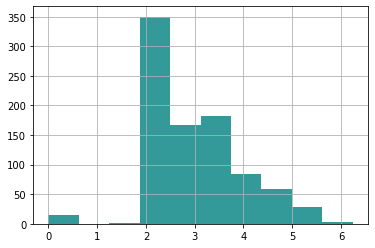

In [277]:
# optional log norm of fare (Ken)
train_data['norm_fare'] = np.log(train_data.Fare+1)
train_data.drop('Fare', axis=1, inplace=True)
print("Fare when normalised: ")
train_data['norm_fare'].hist(color="teal",  alpha=0.8)

In [324]:
## To get rid of the unnecessary variables when dummies are made and drop the variables not needed
train_data = pd.get_dummies(train_data, columns = ["Pclass","Embarked","Sex"])

## Create categorical variable for total family connections
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

train_data.drop('Sex_female', axis=1, inplace=True)
train_data.drop('PassengerId', axis=1, inplace=True)
train_data.drop('Name', axis=1, inplace=True)
train_data.drop('Ticket', axis=1, inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

final_train = train_data
final_train.head()

,Survived,Age,Fare,TotalMembers,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,1,0,0,1,0,0,1,1
1,1,38.0,71.2833,1,1,0,0,1,0,0,0
2,1,26.0,7.9250,0,0,0,1,0,0,1,0
3,1,35.0,53.1000,1,1,0,0,0,0,1,0
4,0,35.0,8.0500,0,0,0,1,0,0,1,1


In [326]:
# For transforming the test data to match the columns of the training data

test_data["Age"].fillna(train_data["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_data["Fare"].mean(skipna=True), inplace=True)
# test_data.Embarked = test_data.Embarked.fillna('S') as there were no missing Embarked instances

test_data['TotalMembers'] = test_data["SibSp"] + test_data["Parch"]
test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)
testing.drop('Cabin', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TotalMembers,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male


In [327]:
final_test.head()

,Age,Fare,TotalMembers,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,0,0,0,1,0,1,0,1
1,47.0,7.0000,1,0,0,1,0,0,1,0
2,62.0,9.6875,0,0,1,0,0,1,0,1
3,27.0,8.6625,0,0,0,1,0,0,1,1
4,22.0,12.2875,2,0,0,1,0,0,1,0


## Final Data Exploration

In order to gain some final clarification before training models; the only changes made were mostly made on the adjustments to Total Family Connections rather than SibSp and Parch, and filling in null values of Age with the median value.


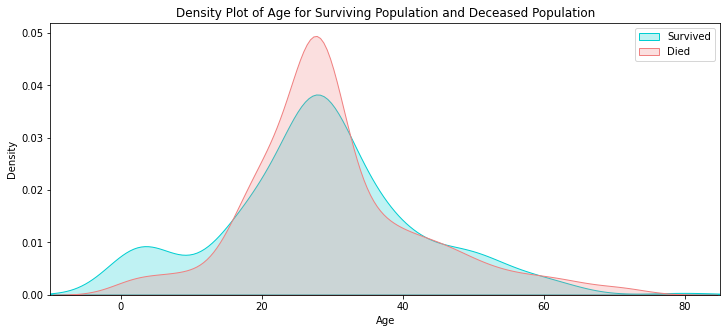

In [332]:
plt.figure(figsize=(12,5))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population'), plt.xlim(-10,85)
ax.set(xlabel='Age')
plt.show()

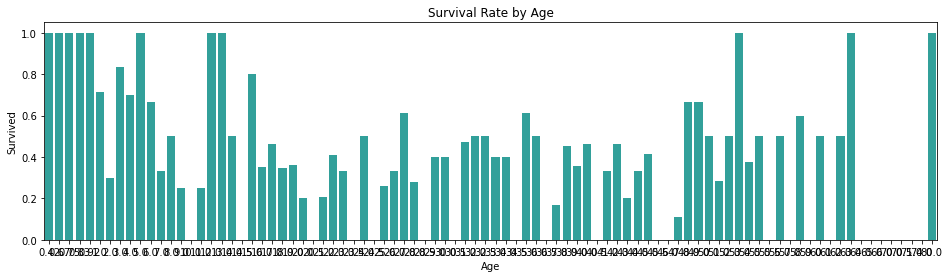

In [356]:
plt.figure(figsize=(16,4))
avg_survival_byage = train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.title('Survival Rate by Age')
plt.show()

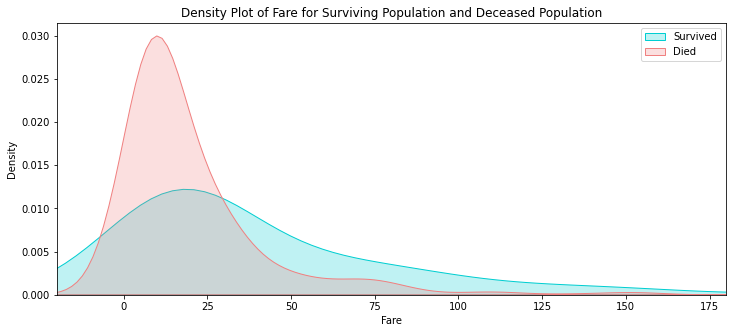

In [344]:
plt.figure(figsize=(12,5))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population'), plt.xlim(-20,180)
ax.set(xlabel='Fare')
plt.show()

Similar to the results before, these visualisations indicate the **youngest** were probably deliberately given precedence in being saved, and perhaps there was a slight bias for older folks rather than the healthy and middle-aged adults. And moreover, the greater the fare, the greater the possibility for survival.

My hypothesis for the graph below, you can see that there appeared to be some 'saturation point' at 3 members that made the prospect of survival most able to be motivated for. 4 or more people just made things more difficult, but 2-3 people could support one another, and the lone traveller needn't care for other people.

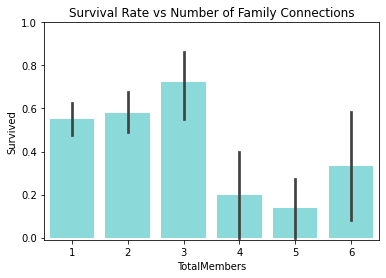

In [407]:
plt.figure(figsize=(6,4))
sns.barplot(x='TotalMembers', y='Survived', data=final_train, color="darkturquoise", alpha=0.5)
plt.title('Survival Rate vs Number of Family Connections')
plt.ylim(-0.01, 1), plt.xlim(0.5, 6.5), 
plt.show()

## Modelling

In [392]:
final_train.head(0)

,Survived,Age,Fare,TotalMembers,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male


Two approaches will be outlined here. One approach, is the ensemble method, where multiple models are compared, for example, Decision Trees, Random Forests, Naive Bayes, Logistic Regression. The other is to just stick with one model. For the purpose of experimentation and learning, I'll first implement Logistic Regression, then see about an ensemble approach.

1. Import the model and make an instance
2. Training the model on the data, storing the information learned from the data; with Logistic Regression, the model is learning the relationship between x (digits) and y (labels)
3. Predict the outcome (y) of new data by using the information the model learned during training

Feature selection can also be performed, for example using RFE (Recursive feature elimination)that assigns weights to features, selecting features by recursively considering smaller and smaller sets of features. These features can then be ranked with RFECV (recursive feature elimination and cross-validation), performing RFE in a cross-validation loop to find the optimal number of features. 

In [423]:
from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE, RFECV

cols = ["Age","Fare","TotalMembers","Pclass_1","Pclass_2","Pclass_3","Embarked_C","Embarked_Q","Embarked_S","Sex_male"] 
X = final_train[cols]
y = final_train['Survived']

# Build a logreg and compute the feature importances
model = LogisticRegression(solver='lbfgs', max_iter=2000)

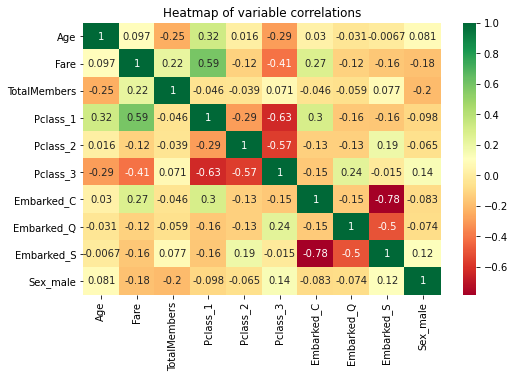

In [401]:
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.title("Heatmap of variable correlations")
plt.show()

The following is model evaluation via Train/test split. The dataset is split into two pieces, so that the model can be trained and tested on different data. Includes accuracy prediction.

In [426]:
# Now, to split data into 4 variables, where test_size = test:train ratio
# random_state can change to change the accuracy scores
from sklearn.model_selection import train_test_split#, cross_val_score
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

model.fit(X_train, y_train)

# Check classification scores of logistic regression
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8132022471910112


In [427]:
# Now, seeing score of X_test and y_test:

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7877094972067039


In [429]:
# Final Kaggle submission

submission = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': model.predict(final_test)})
submission.to_csv("submission.csv", index=False)

print("Your submission was saved.")
submission.tail()

Your submission was saved.


,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


### We're Done, but Final Evaluations

- Better data visualisation, analysis and exploration
- Data could be scaled
- Feature selection and cross-validation could be tried
- Ensemble modelling could be utilised (check Ken's notebook)

But overall, I'm pretty happy with the time that I've spent getting accustomed to Kaggle, Jupyter-Lab, ML and the essence of working in a back-end data-science environment, with much to love about the whole workflow and in particular for me, the data visualisation and potential to continue implementing and testing machine learning in other applications (it is why I am learning this in the first place – because I feel like I could actually put ML to a use, rather than 'learning' it for the sake of the buzz.